In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance = pd.read_csv('/content/new_insurance_data.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [6]:
print(f'The number of Rows: {insurance.shape[0]} and columns: {insurance.shape[1]}')

The number of Rows: 1338 and columns: 13


In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [9]:
insurance.shape

(1338, 13)

In [10]:
insurance.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [11]:
insurance.dropna(inplace=True)

In [13]:
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [14]:
insurance.shape

(1287, 13)

Outiler Detection




In [15]:
col = list(insurance.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

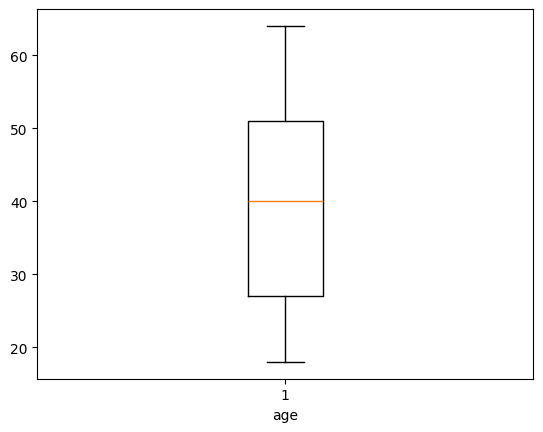

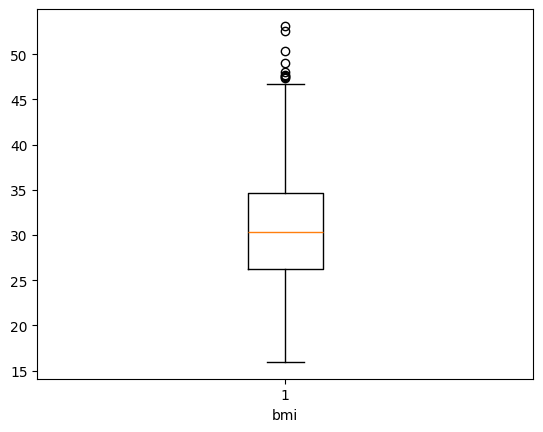

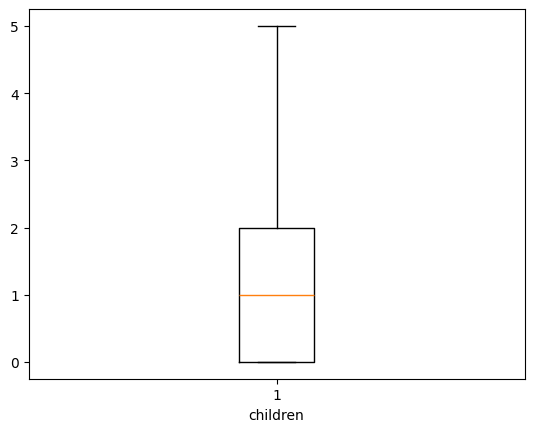

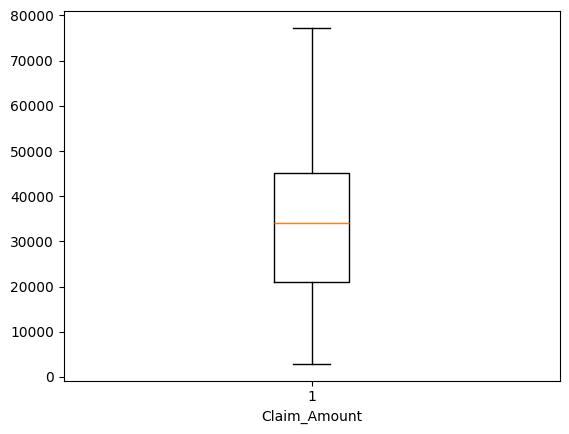

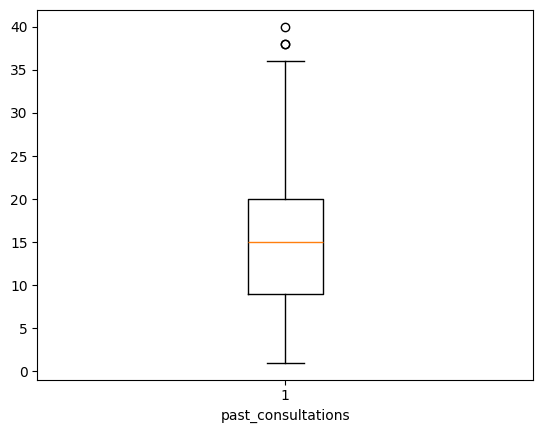

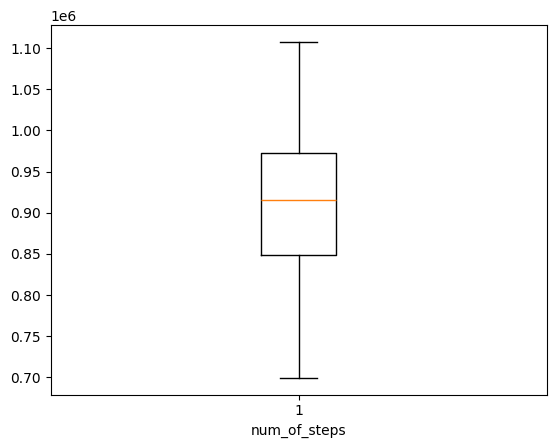

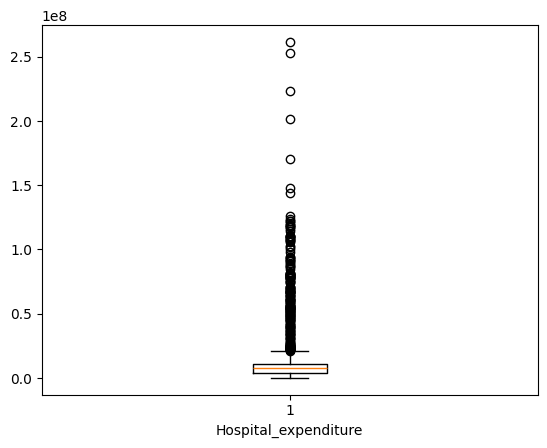

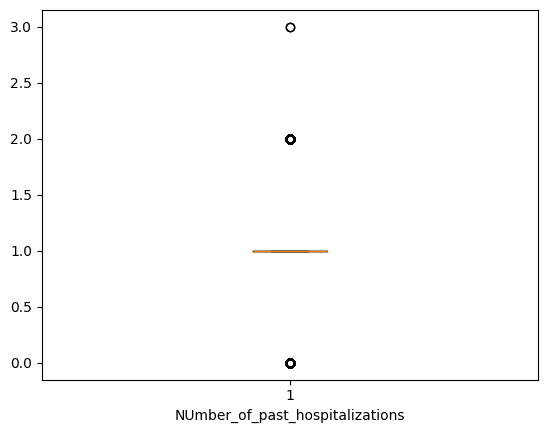

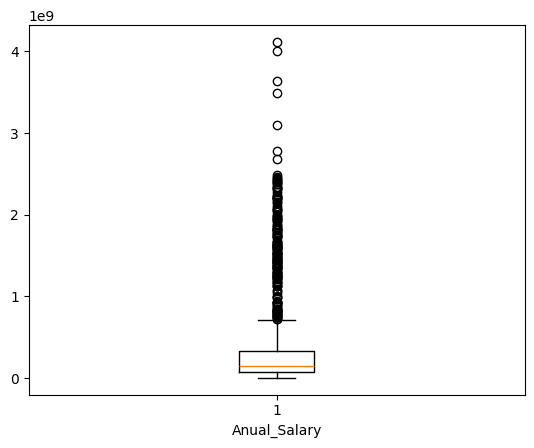

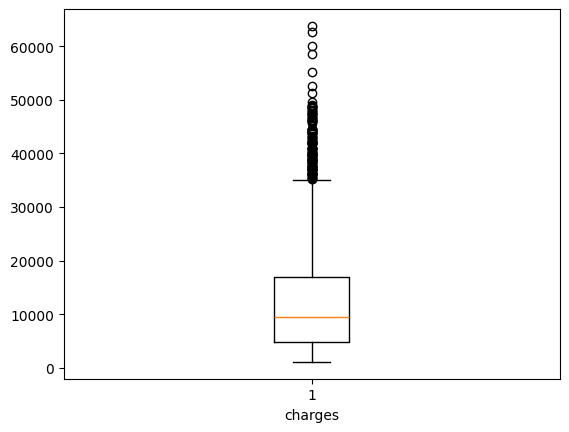

In [16]:
for cname in col:
  if(insurance[cname].dtype =='int64' or insurance[cname].dtype == 'float64'):
    plt.boxplot(insurance[cname])
    plt.xlabel(cname)
    plt.show()

In [17]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [18]:
col = ['bmi', 'past_consultations','Hospital_expenditure','Anual_Salary']

for i in col:
  Q1 = insurance[i].quantile(0.25)
  Q3 = insurance[i].quantile(0.75)
  IQR = Q3 - Q1
  Lower_Bound = Q1 - 1.5 * IQR
  upper_Bound = Q3 + 1.5 * IQR

  insurance = insurance[(insurance[i]>= Lower_Bound) & (insurance[i]<= upper_Bound)]

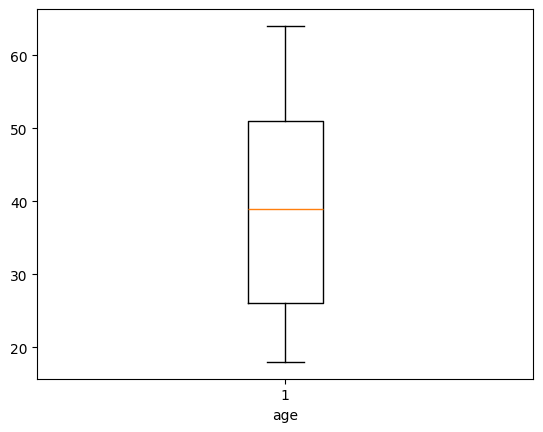

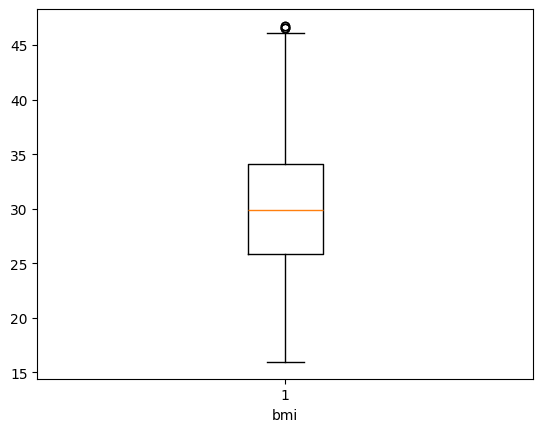

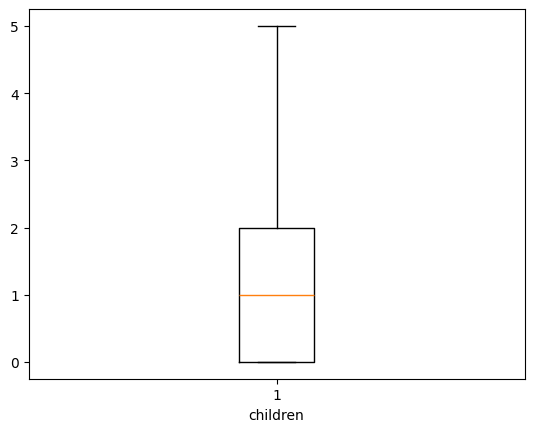

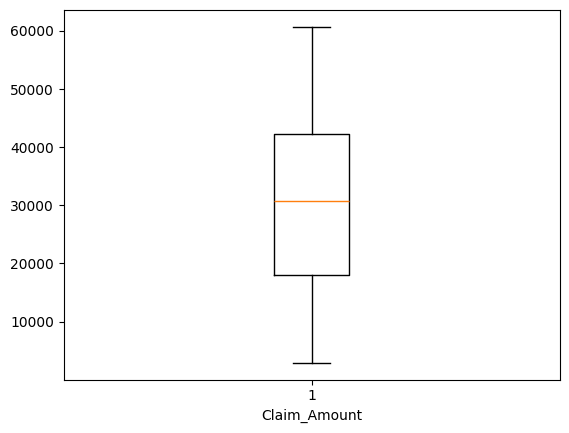

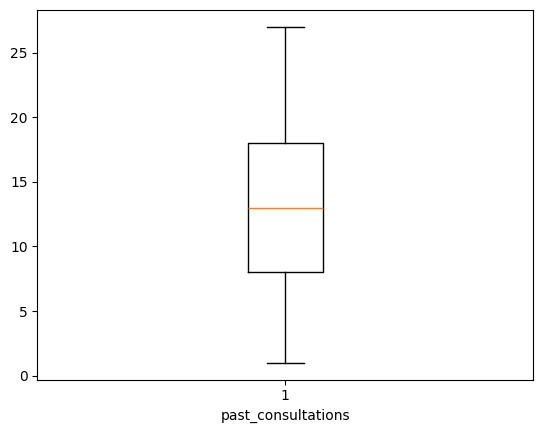

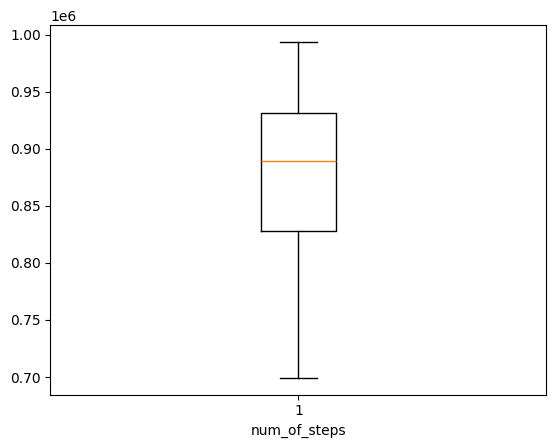

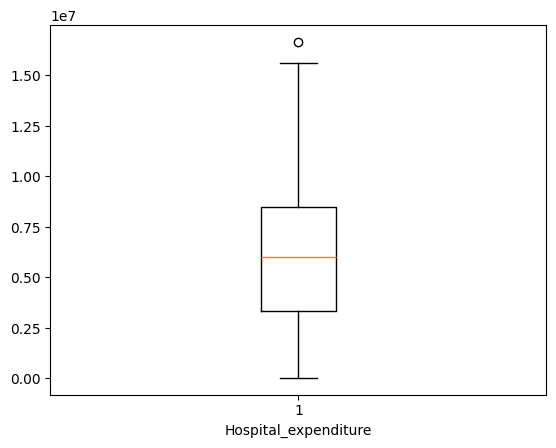

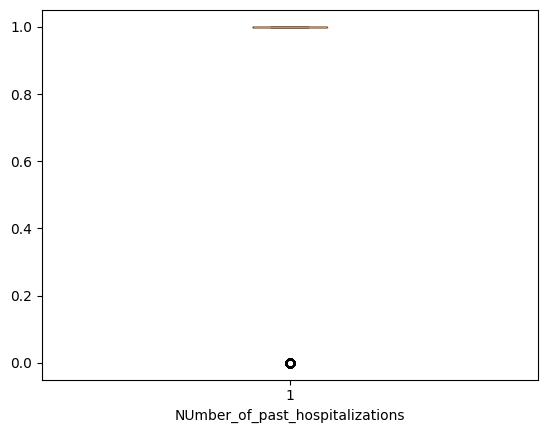

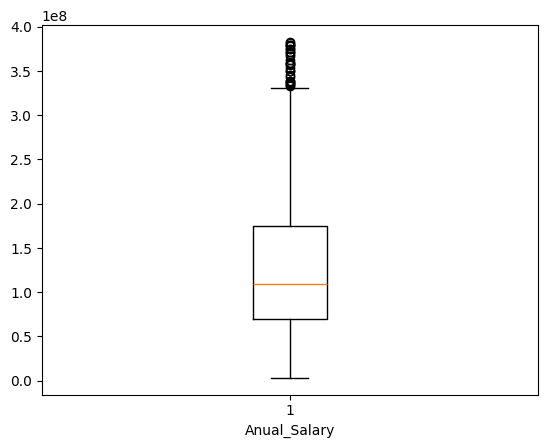

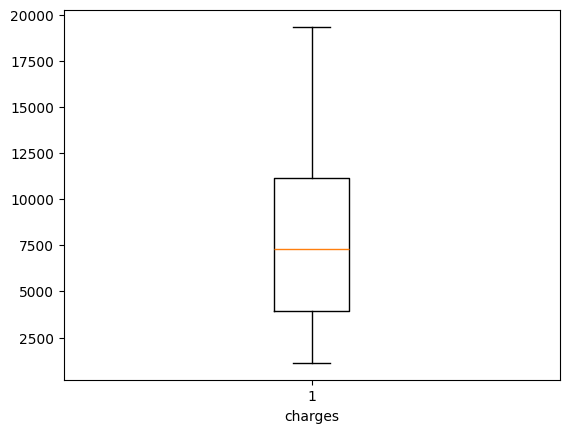

In [19]:
for cname in insurance.columns:
  if(insurance[cname].dtype =='int64' or insurance[cname].dtype == 'float64'):
    plt.boxplot(insurance[cname])
    plt.xlabel(cname)
    plt.show()

In [20]:


insurance.shape

(986, 13)

After cleaning the data -> We gor 986 rows left

Correlation

In [21]:
numCols = insurance.select_dtypes(include=['number'])
corrMat = numCols.corr()
corrMat

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.157363,0.046903,0.106907,0.178307,0.763756,0.161881,0.527364,0.508866,0.682315
bmi,0.157363,1.000000,0.012556,0.013019,0.017543,0.043881,0.013951,0.022507,0.007997,0.019630
children,0.046903,0.012556,1.000000,0.037777,0.043747,0.219064,-0.008496,0.309678,0.066027,0.131216
Claim_Amount,0.106907,0.013019,0.037777,1.000000,0.070665,0.187298,0.050630,0.108704,0.169931,0.194932
past_consultations,0.178307,0.017543,0.043747,0.070665,1.000000,0.265269,0.088732,0.135027,0.273144,0.286770
num_of_steps,0.763756,0.043881,0.219064,0.187298,0.265269,1.000000,0.309669,0.715836,0.794464,0.942969
Hospital_expenditure,0.161881,0.013951,-0.008496,0.050630,0.088732,0.309669,1.000000,0.131773,0.378125,0.366163
NUmber_of_past_hospitalizations,0.527364,0.022507,0.309678,0.108704,0.135027,0.715836,0.131773,1.000000,0.373849,0.532328
Anual_Salary,0.508866,0.007997,0.066027,0.169931,0.273144,0.794464,0.378125,0.373849,1.000000,0.908877
charges,0.682315,0.019630,0.131216,0.194932,0.286770,0.942969,0.366163,0.532328,0.908877,1.000000


<Axes: >

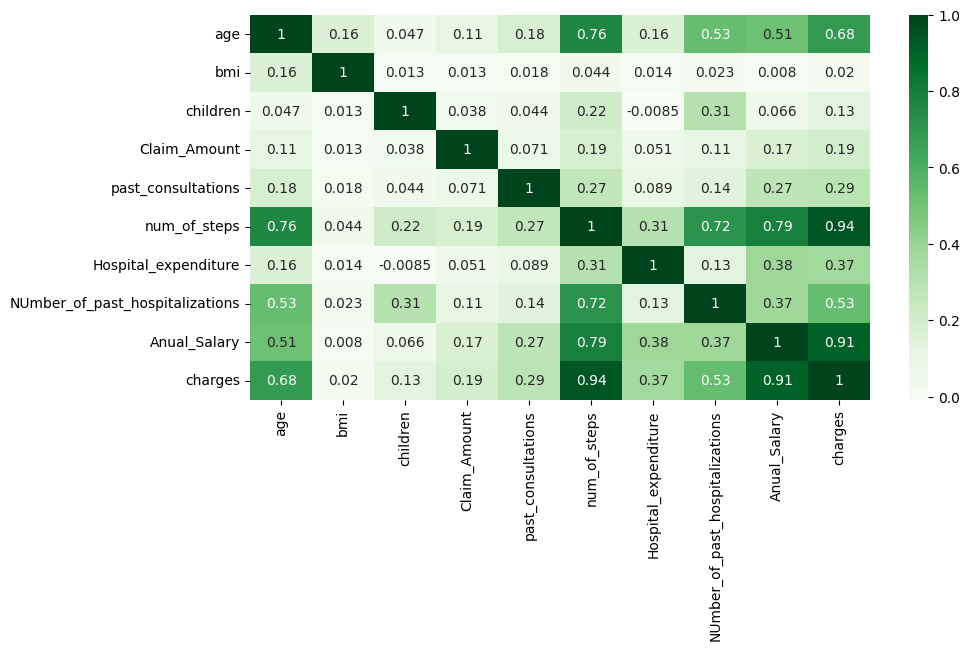

In [22]:
plt.figure(figsize = (10,5))
sns.heatmap(corrMat,cmap='Greens',annot=True)

##**VIF (Variance Inflation Factor)**
Correlation between two independent values, features, columns which we call as **MultiColinearity**

**Note: VIF will tell me which independent column are correlated**
* if VIF Score is high --- Means highly correlated --> Multicolinearity Problem
* If VIF score is below 5 --- Mostly variables are independent ---> it is good for regression

**What we have to do when we have multicolinerity Prob**
* VIF = 1 -> No correlation (Ideal)
* VIF < 5 -> Low Correlation (Okay)
* VIF > 5 -> Higt correlation (We can have problem)

`VIF works only for numerical Columns`

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [24]:
col_list = []
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges') ):
    col_list.append(col)

In [25]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [26]:
x=insurance[col_list]

In [27]:
x

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1036,43.0,20.13,2.0,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08
1041,24.0,27.60,0.0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08
1046,29.0,27.94,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.90,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08


In [34]:
col_list = []
for  col in  insurance.columns:
  if ((insurance[col].dtype != 'object')&(col !='charges')):
    col_list.append(col)
    x=insurance[col_list]

    vif_data =pd.DataFrame()
    vif_data['feature']=x.columns
    vif_data['VIF']= [vif(x.values ,i) for i in range(len(x.columns))]
    vif_data

ValueError: zero-size array to reduction operation maximum which has no identity

In [35]:
col_list = []
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges') ):
    col_list.append(col)
x = insurance[col_list]

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] =[vif(x.values, i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,15.753835
1,bmi,26.544963
2,children,2.020633
3,Claim_Amount,5.676623
4,past_consultations,6.235000
5,num_of_steps,62.458676
6,Hospital_expenditure,5.350005
7,NUmber_of_past_hospitalizations,12.697773
8,Anual_Salary,5.869971


In [36]:
insurance = insurance.drop(['num_of_steps'],axis = 1)

In [37]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [38]:
col_list = [] #trial 2
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges') ):
    col_list.append(col)
x = insurance[col_list]

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] =[vif(x.values, i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,14.789143
1,bmi,12.441712
2,children,2.010492
3,Claim_Amount,5.240451
4,past_consultations,5.807475
5,Hospital_expenditure,5.051307
6,NUmber_of_past_hospitalizations,11.243493
7,Anual_Salary,5.777020


In [39]:
insurance = insurance.drop(['age'],axis = 1)

In [40]:
insurance.columns

Index(['sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [41]:
col_list = [] #trail 3
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges') ):
    col_list.append(col)
x = insurance[col_list]

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] =[vif(x.values, i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,bmi,10.513706
1,children,1.973296
2,Claim_Amount,5.235956
3,past_consultations,5.785051
4,Hospital_expenditure,5.048600
5,NUmber_of_past_hospitalizations,8.728991
6,Anual_Salary,5.009572


In [43]:
insurance=insurance.drop( ['bmi'], axis=1)

In [44]:
insurance.columns

Index(['sex', 'children', 'smoker', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'NUmber_of_past_hospitalizations',
       'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [45]:
col_list = []
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges') ):
    col_list.append(col)
x = insurance[col_list]

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] =[vif(x.values, i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,children,1.971171
1,Claim_Amount,4.557225
2,past_consultations,5.055620
3,Hospital_expenditure,4.591425
4,NUmber_of_past_hospitalizations,7.507790
5,Anual_Salary,4.959906


In [48]:
insurance = insurance.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [49]:
insurance.columns

Index(['sex', 'children', 'smoker', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [50]:
col_list = [] #trial 4
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges') ):
    col_list.append(col)
x = insurance[col_list]

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] =[vif(x.values, i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,children,1.712998
1,Claim_Amount,4.153813
2,past_consultations,4.674082
3,Hospital_expenditure,4.408461
4,Anual_Salary,4.503899


Now VIF Score for other columns are less that 5 -- Good for the regression model

In [51]:
insurance.columns

Index(['sex', 'children', 'smoker', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [52]:
insurance.shape

(986, 9)

In [53]:
insurance.head()

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
0,male,0.0,no,29087.54313,17.0,4720920.992,55784970.05,southeast,1121.8739
1,male,0.0,no,39053.67437,7.0,4329831.676,13700885.19,southeast,1131.5066
2,male,0.0,no,39023.62759,19.0,6884860.774,73523107.27,southeast,1135.9407
3,male,0.0,no,28185.39332,11.0,4274773.550,75819679.60,southeast,1136.3994
4,male,0.0,no,14697.85941,16.0,3787293.921,23012320.01,southeast,1137.0110


Now we will implement Encoding -> Categorical Data into numerical


In [54]:
from sklearn.preprocessing import LabelEncoder
cat_cols = insurance.select_dtypes(include=['object']).columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [55]:
le = LabelEncoder() # In aplhabetical Order
labelMap = {}
for col in cat_cols:
  insurance[col] = le.fit_transform(insurance[col])
  labelMap[col] = dict(zip(le.classes_, le.transform(le.classes_)))
  # le.classes_ -> Categories (Male and female)
  # le.transform(le.classes_ ) -> It is telling me the encoded value of class
  print(f'{col}: {labelMap[col]}')

sex: {'female': np.int64(0), 'male': np.int64(1)}
smoker: {'no': np.int64(0), 'yes': np.int64(1)}
region: {'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


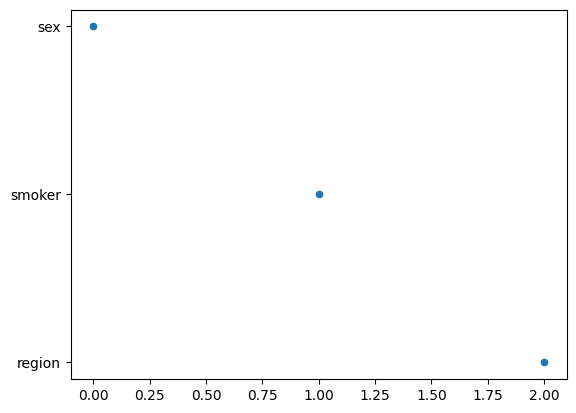

In [97]:
sns.scatterplot(cat_cols)
plt.show()

In [56]:
insurance.head()

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
0,1,0.0,0,29087.54313,17.0,4720920.992,55784970.05,2,1121.8739
1,1,0.0,0,39053.67437,7.0,4329831.676,13700885.19,2,1131.5066
2,1,0.0,0,39023.62759,19.0,6884860.774,73523107.27,2,1135.9407
3,1,0.0,0,28185.39332,11.0,4274773.550,75819679.60,2,1136.3994
4,1,0.0,0,14697.85941,16.0,3787293.921,23012320.01,2,1137.0110


In [57]:
x = insurance.loc[:, ['sex', 'children', 'smoker', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary', 'region',]]
y = insurance['charges']

In [58]:
x

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
0,1,0.0,0,29087.54313,17.0,4.720921e+06,5.578497e+07,2
1,1,0.0,0,39053.67437,7.0,4.329832e+06,1.370089e+07,2
2,1,0.0,0,39023.62759,19.0,6.884861e+06,7.352311e+07,2
3,1,0.0,0,28185.39332,11.0,4.274774e+06,7.581968e+07,2
4,1,0.0,0,14697.85941,16.0,3.787294e+06,2.301232e+07,2
...,...,...,...,...,...,...,...,...
1036,1,2.0,1,44184.65414,19.0,1.473451e+07,3.687871e+08,2
1041,0,0.0,0,27184.27803,9.0,1.266673e+07,3.743228e+08,3
1046,0,1.0,1,51168.25474,23.0,1.665982e+07,3.712188e+08,2
1048,1,3.0,1,46619.40230,27.0,1.361938e+07,3.812895e+08,3


In [59]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1036,18767.73770
1041,18955.22017
1046,19107.77960
1048,19199.94400


In [60]:
from sklearn.model_selection import train_test_split
x_train , y_train, x_test, y_test=train_test_split(x,y,test_size=0.8,random_state=0)


In [63]:
x_train , x_test , y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)

In [64]:
x_train #trainig data

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
174,0,0.0,0,25064.87026,7.0,5.742582e+06,2.811986e+07,0
170,1,0.0,0,38918.57790,12.0,8.922242e+05,6.539836e+07,0
51,1,0.0,0,18755.36301,5.0,9.902820e+06,9.678199e+07,0
326,1,1.0,0,20289.87087,11.0,5.087206e+06,7.255715e+07,0
600,1,2.0,0,52816.36346,11.0,8.351987e+06,7.479506e+07,1
...,...,...,...,...,...,...,...,...
881,0,2.0,0,29665.91751,22.0,2.673580e+06,2.354762e+08,2
208,0,0.0,0,11875.53426,5.0,7.490273e+06,1.090736e+08,0
669,1,1.0,0,23003.85115,23.0,9.884223e+06,1.743057e+08,2
598,1,2.0,0,41499.07020,10.0,8.903075e+06,1.172087e+08,2


In [65]:
y_train #training answer

,charges
174,2755.02095
170,2727.39510
51,1705.62450
326,4667.60765
600,8413.46305
...,...
881,12629.16560
208,3213.62205
669,9386.16130
598,8347.16430


In [67]:
x_test  #testing question

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
248,0,0.0,0,11480.77000,16.0,2.628319e+06,9.513010e+07,2
730,0,0.0,0,55821.53246,17.0,5.048570e+06,1.725900e+08,2
37,0,0.0,0,33968.77416,13.0,1.722553e+06,4.702215e+07,2
397,0,0.0,0,52627.44108,4.0,3.672537e+06,3.496354e+07,0
759,0,2.0,0,52339.88852,20.0,6.853636e+06,2.063369e+08,3
...,...,...,...,...,...,...,...,...
1009,0,1.0,1,35909.40412,13.0,1.113678e+07,3.058401e+08,2
48,1,0.0,0,17317.41565,3.0,5.675523e+06,7.697067e+07,0
689,0,0.0,0,30340.43637,12.0,8.819070e+06,1.035103e+08,1
974,0,0.0,1,33643.94780,6.0,3.693183e+06,2.349833e+08,0


In [68]:
y_test #atual answer

,charges
248,3756.62160
730,10338.93160
37,1633.04440
397,5458.04645
759,10806.83900
...,...
1009,17085.26760
48,1702.45530
689,9644.25250
974,14571.89080


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:

model = LinearRegression()#call my model(object of model)

In [71]:
model.fit(x_train,y_train)#give the training dataset for learn

LinearRegression()

In [73]:
y_pred = model.predict(x_test)# we will give the answer from our model

In [74]:
y_pred

array([ 5642.57675968, 10073.73935252,  3464.58706154,  2988.50927487,
       12310.7693358 ,  5089.30479183,  3739.41388059,  7869.40285472,
        7483.96430518,  3435.2497879 ,  7327.86610843, 10309.23816691,
       13760.25726375,  5301.50367973,  8003.51618079,  4031.01079376,
       12308.04910274, 10253.83969504, 11233.46730323,  3992.29683127,
        3755.05035225,  5701.18494718,  5214.84117474,  8928.15466953,
        4773.810593  ,  5396.5213779 ,  5258.96902813,  5188.8803443 ,
       11113.88845692, 10164.60959245,  7489.47835738,  8293.90655756,
       11056.29526251,  9336.6528035 ,  3889.25534351,  2818.65889248,
        3566.22327067,  8920.23365545,  6473.471523  ,  5838.08122008,
       10852.67787375,  6200.39206284,  4328.19210282,  2107.43567023,
        8449.46009859,  7411.33626135,  3705.67795843,  4769.75023659,
        5699.75148087,  8562.70614757, 14052.77966758,  7777.22074242,
       10540.21536744,  7551.85505117,  3251.35647614,  7073.22266246,
      

In [77]:
errors = pd.DataFrame(columns=['ActualData','PredictedData'])
errors['ActualData']=y_test #actual data
errors['PredictedData']=y_pred #predication data

In [78]:
errors

,ActualData,PredictedData
248,3756.62160,5642.576760
730,10338.93160,10073.739353
37,1633.04440,3464.587062
397,5458.04645,2988.509275
759,10806.83900,12310.769336
...,...,...
1009,17085.26760,15639.666633
48,1702.45530,4505.694932
689,9644.25250,6450.408189
974,14571.89080,11477.022201


In [80]:
errors['Error'] = errors['ActualData'] - errors['PredictedData']
errors

,ActualData,PredictedData,Error
248,3756.62160,5642.576760,-1885.955160
730,10338.93160,10073.739353,265.192247
37,1633.04440,3464.587062,-1831.542662
397,5458.04645,2988.509275,2469.537175
759,10806.83900,12310.769336,-1503.930336
...,...,...,...
1009,17085.26760,15639.666633,1445.600967
48,1702.45530,4505.694932,-2803.239632
689,9644.25250,6450.408189,3193.844311
974,14571.89080,11477.022201,3094.868599


In [83]:
from sklearn.metrics import r2_score

In [84]:
RSquaredScore = r2_score(y_test,y_pred)
RSquaredScore = RSquaredScore*10

In [85]:
print(f'r2 score: {RSquaredScore:.2f}%')

r2 score: 8.31%




let's plot best fit line


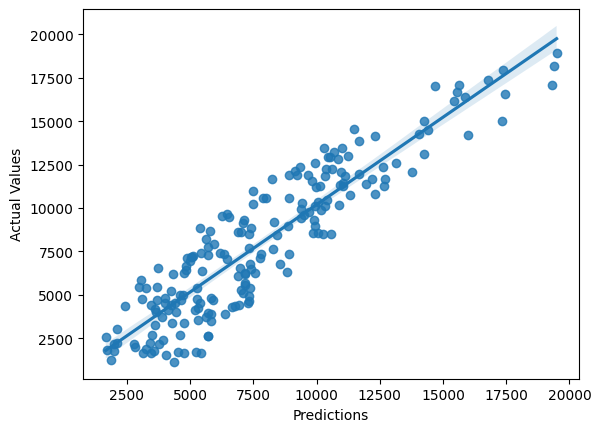

In [86]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.show()

to check the slop for each column

In [87]:
model.coef_ # m values in y = m1x1 + m2x2 + ..... c ---> Here x1, x2 are independent columns

array([-1.23680709e+02,  2.59473392e+02, -1.01196585e+03,  1.24939025e-02,
        3.17275114e+01,  4.10414898e-05,  4.83619862e-05, -3.97492210e+01])

In [88]:
model.intercept_ # c value

np.float64(362.444587020982)

In [89]:
x_test.iloc[10].values

array([0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 1.43938942e+04,
       8.00000000e+00, 5.00514264e+06, 1.21725742e+08, 2.00000000e+00])

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
model.predict([[0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 1.43938942e+04,
       8.00000000e+00, 5.00514264e+06, 1.21725742e+08, 2.00000000e+00]])

array([7327.86609918])